In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

In [5]:
home_values=pd.read_csv("C:\data\zillow\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
rent_values=pd.read_csv("C:\data\zillow\Metro_ZORI_AllHomesPlusMultifamily_Smoothed.csv")

In [6]:
rent_values.head()

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
0,102001,United States,0,1287.0,1298,1299.0,1306,1319,1329,1339,...,1869.0,1886,1903,1909.0,1933.0,1950.0,1973,1999,2019,2031
1,394913,"New York, NY",1,2322.0,2351,2358.0,2364,2398,2416,2435,...,2848.0,2873,2904,2937.0,2990.0,3040.0,3093,3157,3209,3246
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1812.0,1843,1830.0,1839,1862,1881,1899,...,2730.0,2754,2777,2796.0,2829.0,2859.0,2896,2930,2949,2964
3,394463,"Chicago, IL",3,1441.0,1454,1455.0,1460,1476,1490,1499,...,1784.0,1790,1803,1817.0,1831.0,1854.0,1877,1901,1919,1932
4,394514,"Dallas-Fort Worth, TX",4,1101.0,1127,1132.0,1148,1144,1147,1151,...,1673.0,1692,1703,1713.0,1728.0,1738.0,1764,1795,1823,1834


In [7]:
home_values.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,102001,0,United States,Country,NaN,128193.0,128540.0,128904.0,129647.0,130396.0,...,315164.0,319079.0,323445.0,328180.0,333400.0,338673.0,344230.0,349265.0,353446.0,355852.0
1,394913,1,"New York, NY",Msa,NY,225281.0,226627.0,227838.0,230222.0,232442.0,...,571576.0,575145.0,578396.0,582369.0,587022.0,593470.0,600621.0,608159.0,614185.0,618517.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,228935.0,229732.0,230953.0,233274.0,235763.0,...,842992.0,850126.0,859335.0,870012.0,882230.0,899552.0,918626.0,935074.0,936406.0,933282.0
3,394463,3,"Chicago, IL",Msa,IL,170843.0,171246.0,171768.0,172812.0,173918.0,...,287525.0,290233.0,292966.0,295614.0,298193.0,301504.0,304988.0,308971.0,311970.0,313828.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130922.0,131027.0,131114.0,131327.0,131550.0,...,334386.0,339874.0,345774.0,353216.0,361748.0,369869.0,379389.0,388117.0,395694.0,397905.0


In [8]:
valid_cities = [
    "New York, NY",
    "Chicago, IL",
    "Los Angeles-Long Beach-Anaheim, CA",
    "Philadelphia, PA",
    "Houston, TX",
    "Phoenix, AZ",
]

In [9]:
selection=home_values['RegionName'].isin(valid_cities)
home_value_trimmed=home_values.loc[selection]

In [10]:
selection=rent_values['RegionName'].isin(valid_cities)
rent_value_trimmed=rent_values.loc[selection]

In [11]:
rent_value_trimmed

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
1,394913,"New York, NY",1,2322.0,2351,2358.0,2364,2398,2416,2435,...,2848.0,2873,2904,2937.0,2990.0,3040.0,3093,3157,3209,3246
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1812.0,1843,1830.0,1839,1862,1881,1899,...,2730.0,2754,2777,2796.0,2829.0,2859.0,2896,2930,2949,2964
3,394463,"Chicago, IL",3,1441.0,1454,1455.0,1460,1476,1490,1499,...,1784.0,1790,1803,1817.0,1831.0,1854.0,1877,1901,1919,1932
5,394974,"Philadelphia, PA",5,1334.0,1300,1321.0,1324,1333,1344,1349,...,1730.0,1745,1767,1762.0,1773.0,1787.0,1800,1816,1832,1844
6,394692,"Houston, TX",6,1164.0,1192,1181.0,1189,1214,1227,1241,...,1523.0,1531,1541,1539.0,1550.0,1561.0,1573,1587,1599,1602
14,394976,"Phoenix, AZ",14,947.0,961,956.0,957,966,972,974,...,1830.0,1855,1862,1873.0,1883.0,1895.0,1910,1923,1926,1921


In [12]:
x=['SizeRank','RegionID',"RegionType","StateName"]
home_value_final=home_value_trimmed.drop(x,axis=1)

In [13]:
columns=['SizeRank','RegionID']
rent_value_final=rent_value_trimmed.drop(columns,axis=1)

In [14]:
rent_value_final

,RegionName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
1,"New York, NY",2322.0,2351,2358.0,2364,2398,2416,2435,2443,2446,...,2848.0,2873,2904,2937.0,2990.0,3040.0,3093,3157,3209,3246
2,"Los Angeles-Long Beach-Anaheim, CA",1812.0,1843,1830.0,1839,1862,1881,1899,1915,1924,...,2730.0,2754,2777,2796.0,2829.0,2859.0,2896,2930,2949,2964
3,"Chicago, IL",1441.0,1454,1455.0,1460,1476,1490,1499,1502,1496,...,1784.0,1790,1803,1817.0,1831.0,1854.0,1877,1901,1919,1932
5,"Philadelphia, PA",1334.0,1300,1321.0,1324,1333,1344,1349,1354,1358,...,1730.0,1745,1767,1762.0,1773.0,1787.0,1800,1816,1832,1844
6,"Houston, TX",1164.0,1192,1181.0,1189,1214,1227,1241,1249,1249,...,1523.0,1531,1541,1539.0,1550.0,1561.0,1573,1587,1599,1602
14,"Phoenix, AZ",947.0,961,956.0,957,966,972,974,978,981,...,1830.0,1855,1862,1873.0,1883.0,1895.0,1910,1923,1926,1921


In [15]:
home_value_final

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
1,"New York, NY",225281.0,226627.0,227838.0,230222.0,232442.0,234805.0,237288.0,239859.0,242437.0,...,571576.0,575145.0,578396.0,582369.0,587022.0,593470.0,600621.0,608159.0,614185.0,618517.0
2,"Los Angeles-Long Beach-Anaheim, CA",228935.0,229732.0,230953.0,233274.0,235763.0,238114.0,240521.0,243047.0,245453.0,...,842992.0,850126.0,859335.0,870012.0,882230.0,899552.0,918626.0,935074.0,936406.0,933282.0
3,"Chicago, IL",170843.0,171246.0,171768.0,172812.0,173918.0,175015.0,176228.0,177589.0,178995.0,...,287525.0,290233.0,292966.0,295614.0,298193.0,301504.0,304988.0,308971.0,311970.0,313828.0
5,"Philadelphia, PA",130359.0,130796.0,131058.0,131710.0,132238.0,132835.0,133383.0,133967.0,134615.0,...,310909.0,313401.0,315690.0,318248.0,320804.0,324066.0,327757.0,332095.0,335593.0,338231.0
6,"Houston, TX",126394.0,126472.0,126353.0,126472.0,126479.0,126681.0,126811.0,127090.0,127446.0,...,274426.0,277596.0,281019.0,284479.0,288795.0,294155.0,300160.0,305742.0,309933.0,312533.0
14,"Phoenix, AZ",142839.0,143215.0,143669.0,144561.0,145451.0,146126.0,146849.0,147535.0,148362.0,...,418635.0,424834.0,430947.0,436727.0,445371.0,454535.0,465962.0,474655.0,480985.0,478985.0


In [16]:
ZHVI=pd.melt(
    home_value_final,
    id_vars=["RegionName"],
    value_name="ZHVI",
    var_name="Date"
)

In [17]:
ZRI = pd.melt(
    rent_value_final, 
    id_vars=["RegionName"], 
    value_name="ZRI", 
    var_name="Date"
)

In [18]:
ZRI.tail()

,RegionName,Date,ZRI
613,"Los Angeles-Long Beach-Anaheim, CA",2022-07,2964.0
614,"Chicago, IL",2022-07,1932.0
615,"Philadelphia, PA",2022-07,1844.0
616,"Houston, TX",2022-07,1602.0
617,"Phoenix, AZ",2022-07,1921.0


In [19]:
ZHVI.head()

,RegionName,Date,ZHVI
0,"New York, NY",2000-01-31,225281.0
1,"Los Angeles-Long Beach-Anaheim, CA",2000-01-31,228935.0
2,"Chicago, IL",2000-01-31,170843.0
3,"Philadelphia, PA",2000-01-31,130359.0
4,"Houston, TX",2000-01-31,126394.0


In [20]:
zillow_data = pd.merge(ZRI, ZHVI, on=['Date', 'RegionName'], how='outer')

In [21]:
zillow_data  = zillow_data.sort_values("Date", ascending=True)

zillow_data

,RegionName,Date,ZRI,ZHVI
623,"Phoenix, AZ",2000-01-31,NaN,142839.0
618,"New York, NY",2000-01-31,NaN,225281.0
619,"Los Angeles-Long Beach-Anaheim, CA",2000-01-31,NaN,228935.0
620,"Chicago, IL",2000-01-31,NaN,170843.0
621,"Philadelphia, PA",2000-01-31,NaN,130359.0
...,...,...,...,...
2238,"New York, NY",2022-07-31,NaN,618517.0
2239,"Los Angeles-Long Beach-Anaheim, CA",2022-07-31,NaN,933282.0
2240,"Chicago, IL",2022-07-31,NaN,313828.0
2241,"Philadelphia, PA",2022-07-31,NaN,338231.0


In [23]:
zillow_data["Date"] = pd.to_datetime(zillow_data["Date"])

In [24]:
zillow_data['Date'].head()

623   2000-01-31
618   2000-01-31
619   2000-01-31
620   2000-01-31
621   2000-01-31
Name: Date, dtype: datetime64[ns]

In [25]:
zillow_data['Month']=zillow_data['Date'].dt.month

In [26]:
zillow_data['Year']=zillow_data['Date'].dt.year

In [27]:
zillow_data.head()

,RegionName,Date,ZRI,ZHVI,Month,Year
623,"Phoenix, AZ",2000-01-31,NaN,142839.0,1,2000
618,"New York, NY",2000-01-31,NaN,225281.0,1,2000
619,"Los Angeles-Long Beach-Anaheim, CA",2000-01-31,NaN,228935.0,1,2000
620,"Chicago, IL",2000-01-31,NaN,170843.0,1,2000
621,"Philadelphia, PA",2000-01-31,NaN,130359.0,1,2000


In [28]:
annual_ZHVI= zillow_data.groupby(['RegionName','Year'])['ZHVI'].mean()
annual_ZRI=zillow_data.groupby(['RegionName','Year'])['ZRI'].mean()

In [29]:
print(type(annual_ZHVI))

<class 'pandas.core.series.Series'>


In [30]:
annual_ZHVI.head()

RegionName   Year
Chicago, IL  2000    176107.833333
             2001    190745.250000
             2002    205350.500000
             2003    220379.916667
             2004    237042.833333
Name: ZHVI, dtype: float64

In [31]:
annual_ZRI.head()

RegionName   Year
Chicago, IL  2000   NaN
             2001   NaN
             2002   NaN
             2003   NaN
             2004   NaN
Name: ZRI, dtype: float64

In [32]:
annual_ZHVI=annual_ZHVI.reset_index()
annual_ZRI=annual_ZRI.reset_index()

In [33]:
annual_ZHVI.head(n=50)

,RegionName,Year,ZHVI
0,"Chicago, IL",2000,176107.833333
1,"Chicago, IL",2001,190745.250000
2,"Chicago, IL",2002,205350.500000
3,"Chicago, IL",2003,220379.916667
4,"Chicago, IL",2004,237042.833333
5,"Chicago, IL",2005,257666.000000
6,"Chicago, IL",2006,274795.083333
7,"Chicago, IL",2007,276928.083333
8,"Chicago, IL",2008,257053.444444
9,"Chicago, IL",2009,227865.000000


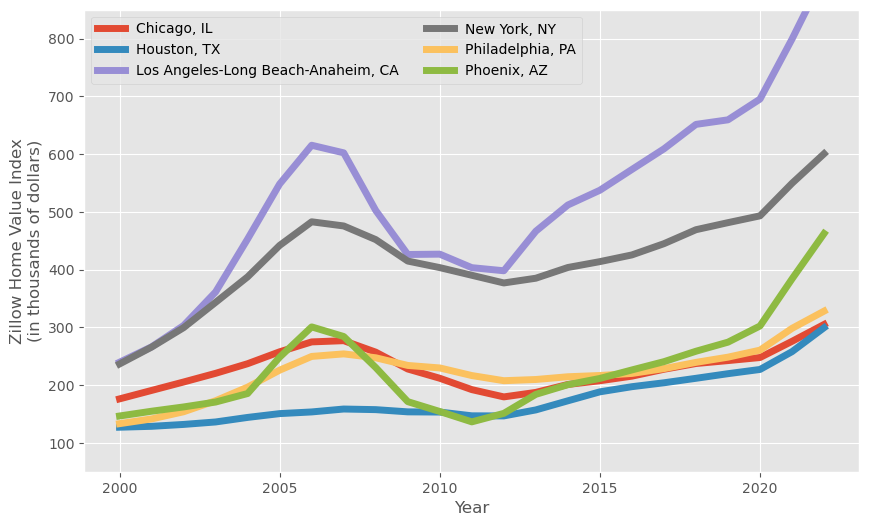

In [40]:
with plt.style.context("ggplot"):
    fig, ax=plt.subplots(figsize=(10,6))
    for city in annual_ZHVI["RegionName"].unique():
        selection=annual_ZHVI["RegionName"]==city
        df=annual_ZHVI.loc[selection]
        ax.plot(df["Year"],df["ZHVI"]/1000, label=city, linewidth=5)
    ax.set_ylim(50,850)
    ax.legend(loc=0, ncol=2, fontsize=10)
    ax.set_ylabel("Zillow Home Value Index\n(in thousands of dollars)")
    ax.set_xlabel('Year')

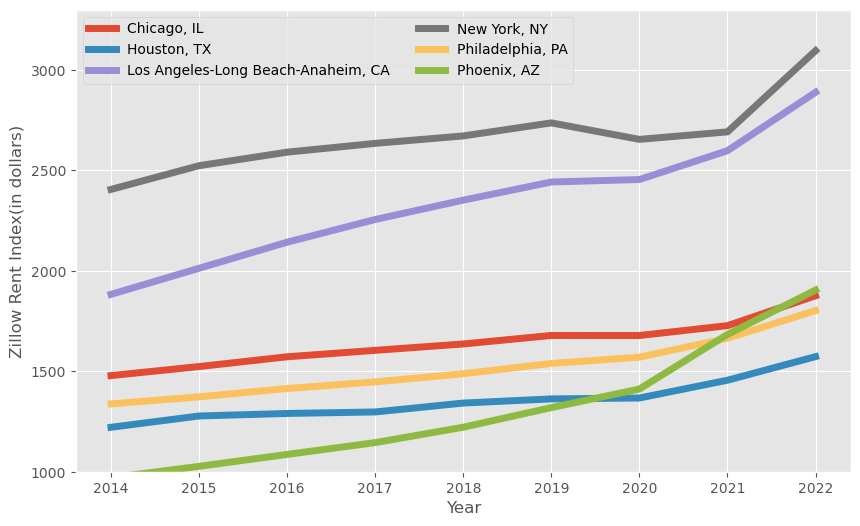

In [47]:
with plt.style.context('ggplot'):
    fig, ax=plt.subplots(figsize=(10,6))
    for city in annual_ZRI['RegionName'].unique():
        selection=annual_ZRI['RegionName']==city
        df=annual_ZRI.loc[selection]
        ax.plot(df['Year'],df['ZRI'],label=city, linewidth=5)
    ax.set_ylim(1000,3300)
    ax.legend(loc=0, ncol=2,fontsize=10)
    ax.set_ylabel('Zillow Rent Index(in dollars)')
    ax.set_xlabel('Year')